<a href="https://colab.research.google.com/github/walidba/DS-Portfolio/blob/master/Titanic(EDA%2Bprediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####  **1. Business Understanding**

The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. That's why the name DieTanic. This is a very unforgetable disaster that no one in the world can forget.

It took about $7.5 million to build the Titanic and it sunk under the ocean due to collision.
One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

The Objective of this notebook is to predict survival on the Titanic and understand the most important reasons passangers survived the Titanic sinking.




 #### **2. Exploratory Data Analysis(EDA)**

 Let's start by importing the necessary libraries, loading data and exploring its features.







In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data = pd.read_csv('data/train.csv')

In [0]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* **Cheking for null values in each variable:**


In [0]:
data.isnull().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The **Age, Cabin and Embarked** variables have null values. We will deal with them later.


Let's check how many passengers survived.


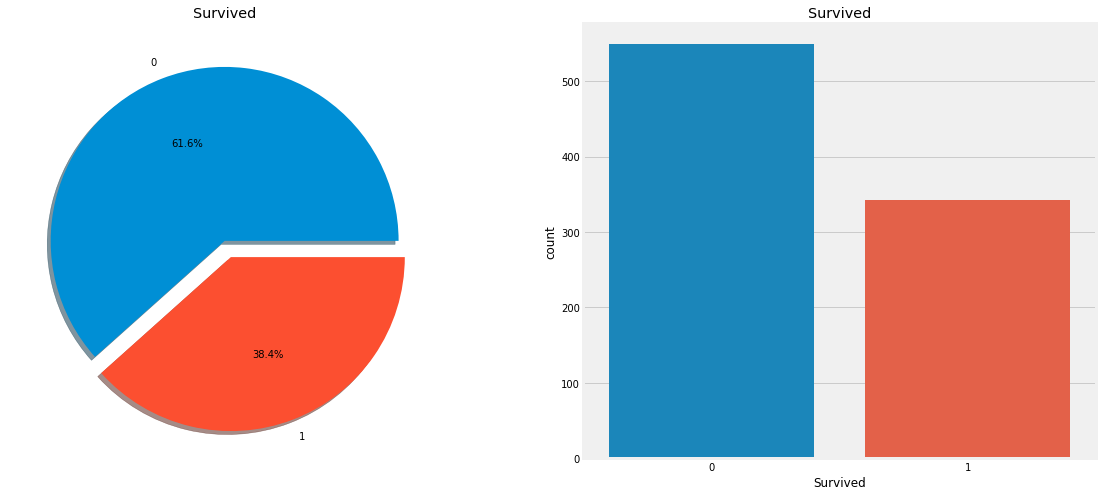

In [0]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show() 

It's evident that many passengers didn't survive the accident.</br>
Out of 891 passengers in training set, only around 350 survived i.e Only 38.4% of the total training set survived the crash. </br>
We need to dig down more to get better insights from the data and see which categories of the passengers did survive and who didn't.


We will try to check the survival rate by using the different features of the dataset. Some of the features being Sex, Port Of Embarcation, Age,etc.





In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


####**Features Analysis**


* **Sex**


In [0]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

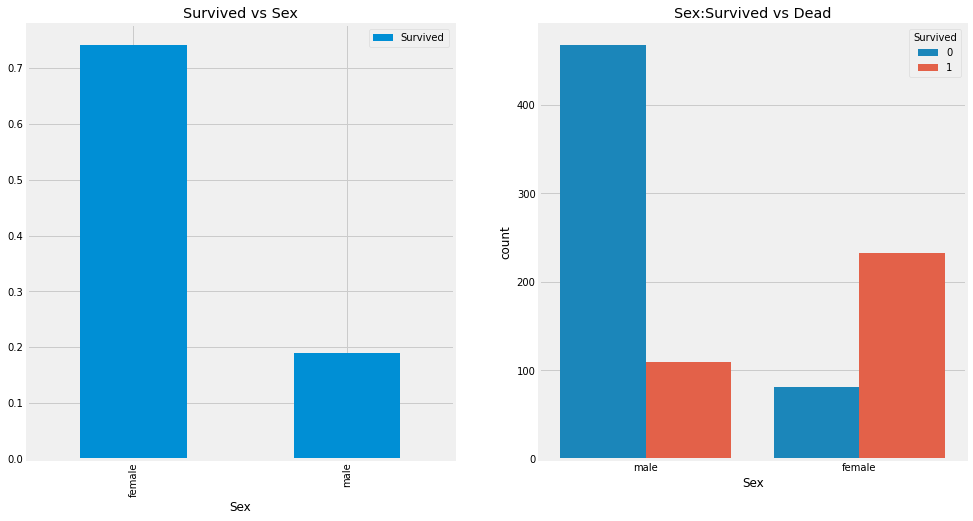

In [0]:
f,ax=plt.subplots(1,2,figsize=(15,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

The number of men on the ship was lot more than the number of women. Still the number of women saved is almost twice the number of males saved. The survival rates for a women on the ship is around 75% while that for men in around 18-19%.

This looks to be a very important feature for modeling. Lets check other features.


* **Pclass**

In [0]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')


Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


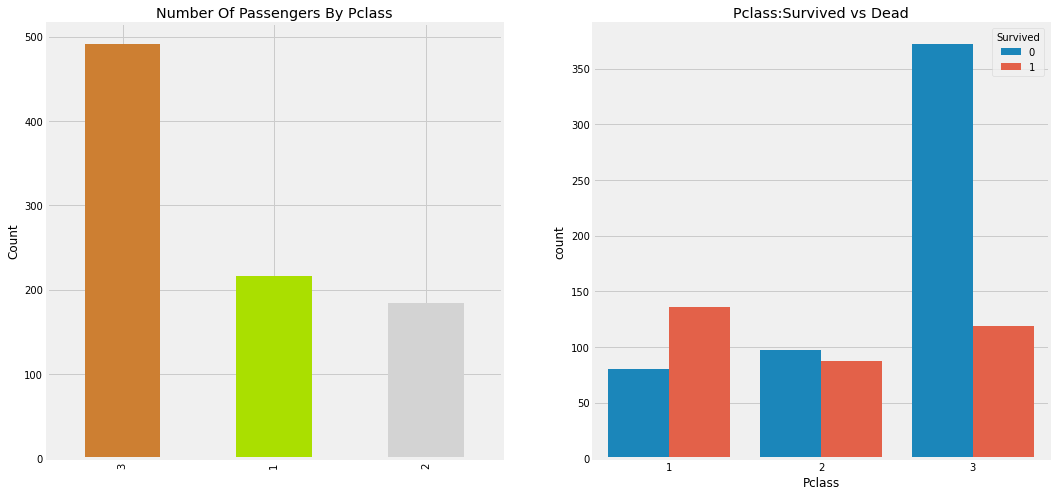

In [0]:
f,ax=plt.subplots(1,2,figsize=(16,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#AADF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()


 We can clearly see that Passenegers Of Pclass 1 were given a very high priority while rescue. Even though the the number of Passengers in Pclass 3 were a lot higher, still the number of survival from them is very low, somewhere around 25%.
 

For Pclass 1 %survived is around 63% while for Pclass2 is around 48%. So money and status matters. Such a materialistic world.

Lets Dive in little bit more and check for other interesting observations. Lets check survival rate with Sex and Pclass Together.

In [0]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

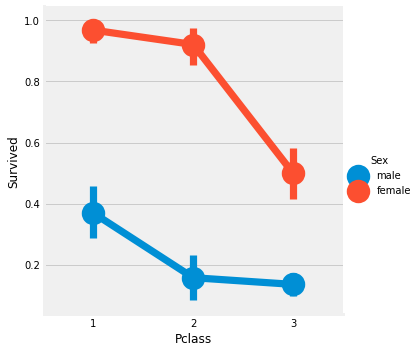

In [0]:
sns.factorplot('Pclass','Survived',hue='Sex',data=data)
plt.show()

Looking at the CrossTab and the FactorPlot, we can easily deduce that survival for Women from Pclass1 is about 95-96%, as only 3 out of 94 Women from Pclass1 died.


It is evident that irrespective of Pclass, Women were given first priority while rescue. Even Men from Pclass1 have a very low survival rate.

Looks like Pclass is also an important feature. Lets analyse other features.

* **Age**


In [0]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


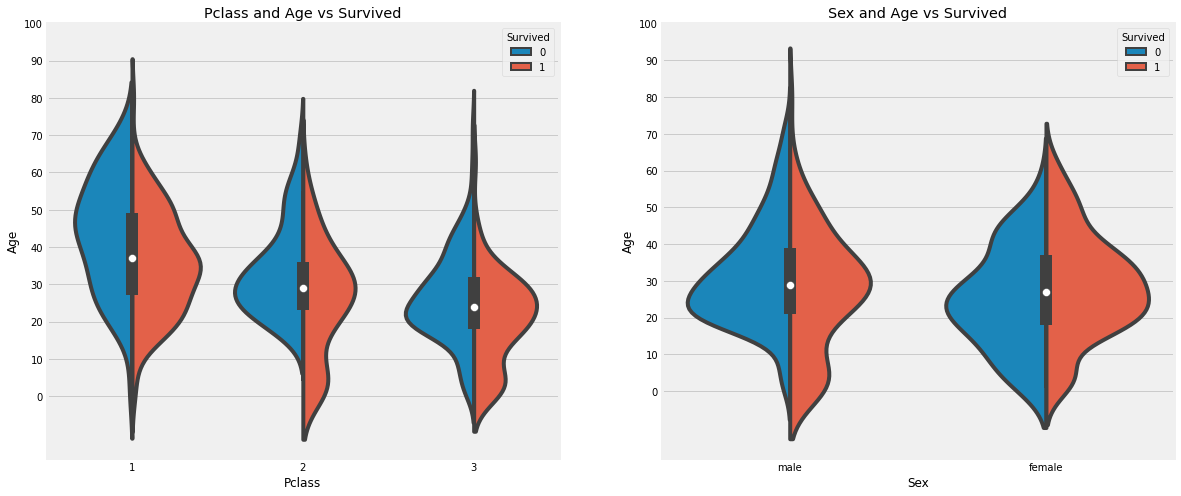

In [0]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

The number of children increases with Pclass and the survival rate for passenegers below Age 10 (i.e children) looks to be good irrespective of the Pclass.

Survival chances for Passenegers aged 20-50 from Pclass 1 is high and is even better for Women.

For males, the survival chances decreases with an increase in age.
But the problem is, there were many people with many different ages. We just cant assign a 4 year kid with the mean age that is 29 years. Is there any way to find out what age-band does the passenger lie??

We can check the Name feature. Looking upon the feature, we can see that the names have a salutation like Mr or Mrs. Thus we can assign the mean values of Mr and Mrs to the respective groups.


In [0]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [0]:
data.groupby('Initial')['Age'].mean() #lets check the average age by Initials


Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

\- **Filling Age NaN**




In [0]:
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [0]:
data.Age.isnull().any() #So no null values left finally 


False

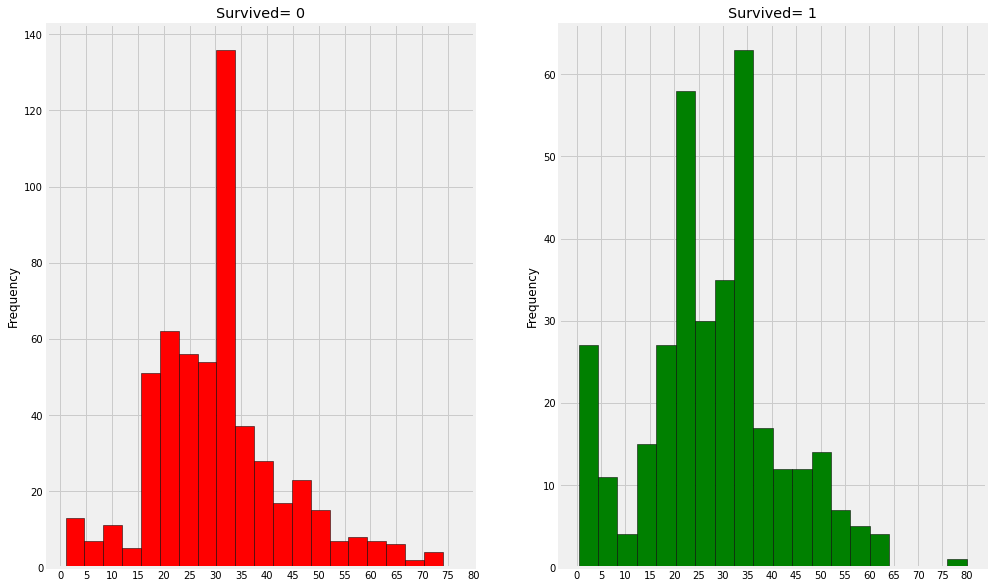

In [0]:
f,ax=plt.subplots(1,2,figsize=(15,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

* The Toddlers(age<5)  were saved in large numbers(The Women and Child First Policy).

* The oldest Passenger was saved(80 years).

* The Maximum number of deaths and survivors were in the age group of 30-40


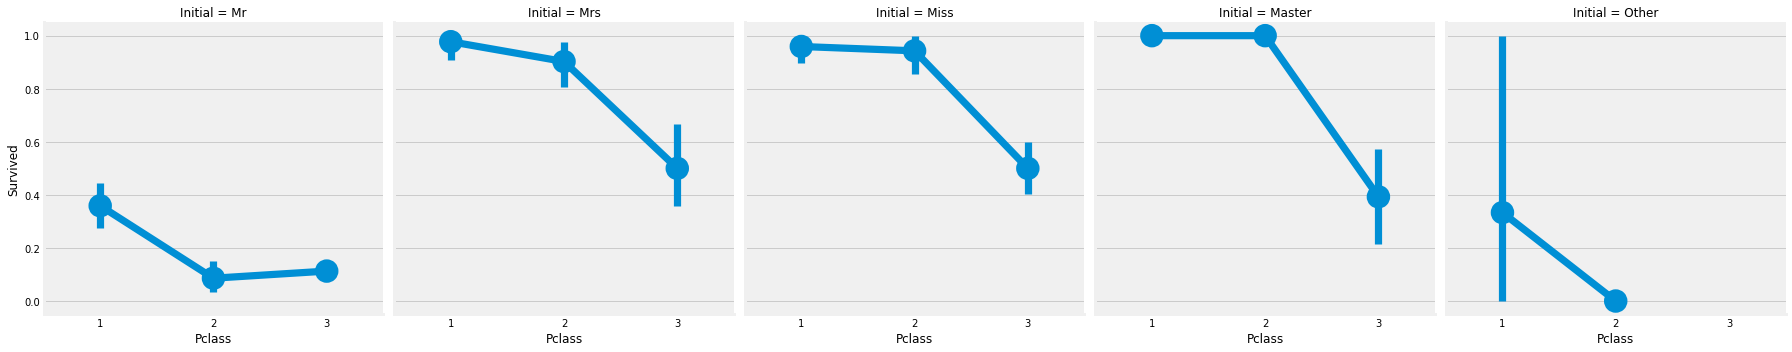

In [0]:
sns.factorplot('Pclass','Survived',col='Initial',data=data)
plt.show()

Women and child first policy thus holds true regardless of the class.



* **Embarked**

In [0]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

\- **Chances for survival by port of embarkation**

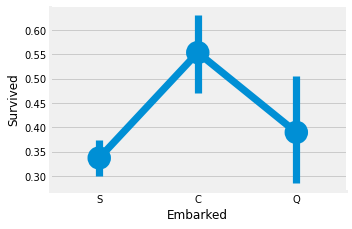

In [0]:
sns.factorplot('Embarked','Survived',data=data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

The chances for survival for Port C is highest around 0.55 while it is lowest for S.



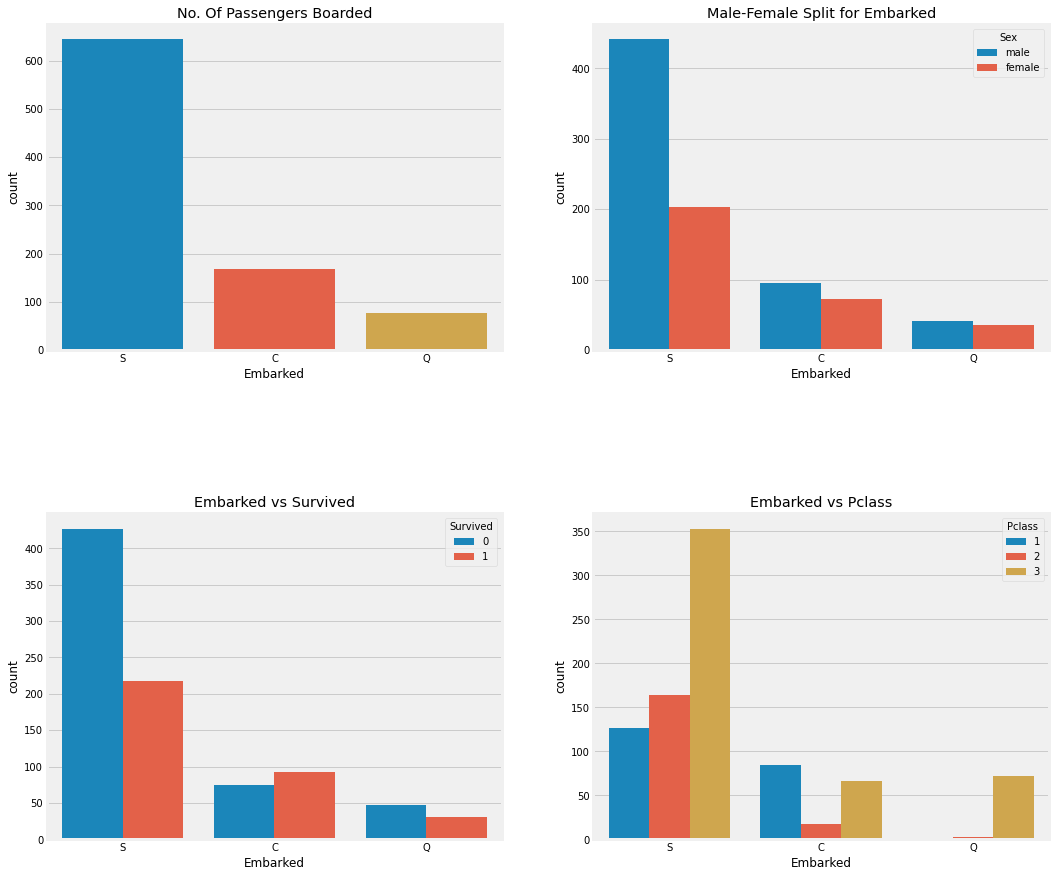

In [0]:
f,ax=plt.subplots(2,2,figsize=(16,15))
sns.countplot('Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

Maximum passenegers boarded from S. Majority of them being from Pclass3.

The Passengers from C look to be lucky as a good proportion of them survived. The reason for this maybe the rescue of all the Pclass1 and Pclass2 Passengers.

The Embark S looks to the port from where majority of the rich people boarded. Still the chances for survival is low here, that is because many passengers from Pclass3 around 81% didn't survive.

Port Q had almost 95% of the passengers were from Pclass3.



\- **Filling Embarked NaN**




\- As we saw that maximum passengers boarded from Port S, so we will replace NaN with S.



In [0]:
data.Embarked.fillna('S',inplace=True)

In [0]:
data.Embarked.isnull().any()

False

* **SibSp**

This feature represents whether a person was alone or with his family members.

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife

In [0]:
pd.crosstab(data.SibSp,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
SibSp,,,
0,398,210,608
1,97,112,209
2,15,13,28
3,12,4,16
4,15,3,18
5,5,0,5
8,7,0,7
All,549,342,891


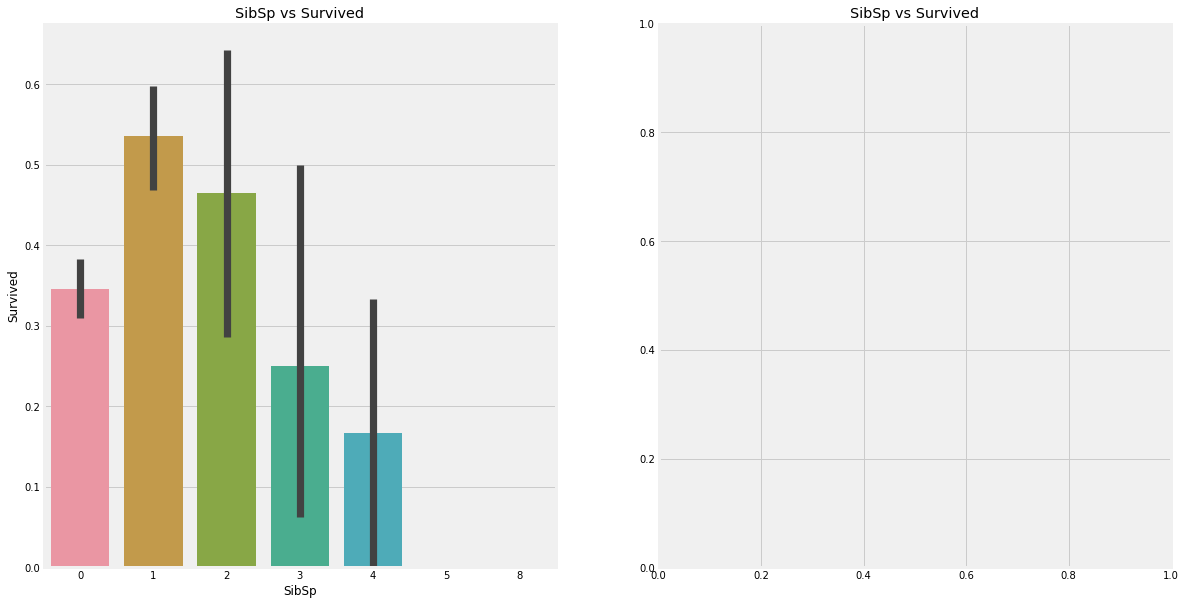

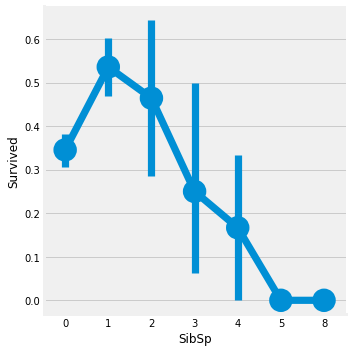

In [0]:
f,ax=plt.subplots(1,2,figsize=(18,10))
sns.barplot('SibSp','Survived',data=data,ax=ax[0])

ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp','Survived',data=data,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.show()

\- The barplot and factorplot show that if a passenger is alone onboard with no siblings, he has 34.5% survival rate. This rate roughly decreases if the number of siblings increases. This makes sense. That is, if I have a family on board, I will try to save them instead of saving myself first. Surprisingly the survival for families with 5-8 members is 0%. The reason may be Pclass??


In [0]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')


Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7



The reason is Pclass. The crosstab shows that Person with SibSp>3 were all in Pclass3. It is imminent that all the large families in Pclass 3(>3) died.

* **Parch**

In [0]:
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')


Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


\- The crosstab again shows that larger families were in Pclass3.



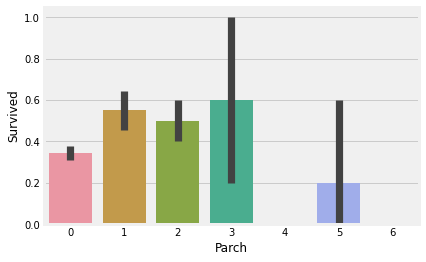

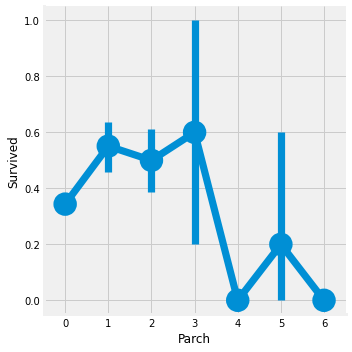

In [0]:
#f,ax = plt.subplots(2,1,figsize=(18,10))
sns.barplot('Parch','Survived',data=data)#,ax=ax[0])
#ax[0].set_title('Parch vs. Survived')
sns.factorplot('Parch','Survived',data=data)#,ax=ax[1])
plt.grid(True)

plt.show()

\- Here too the results are quite similar. Passengers with their parents onboard have greater chance of survival. It however reduces as the number goes up.

\- The chances of survival is good for somebody who has 1-3 parents on the ship. Being alone also proves to be fatal and the chances for survival decrease when somebody has >4 parents on the ship.

* **Fare**

In [0]:
print('Highest Fare was: ',data.Fare.max())
print('Lowest Fare was: ',data.Fare.min())
print('Average Fare was: ',data.Fare.mean())


Highest Fare was:  512.3292
Lowest Fare was:  0.0
Average Fare was:  32.2042079685746


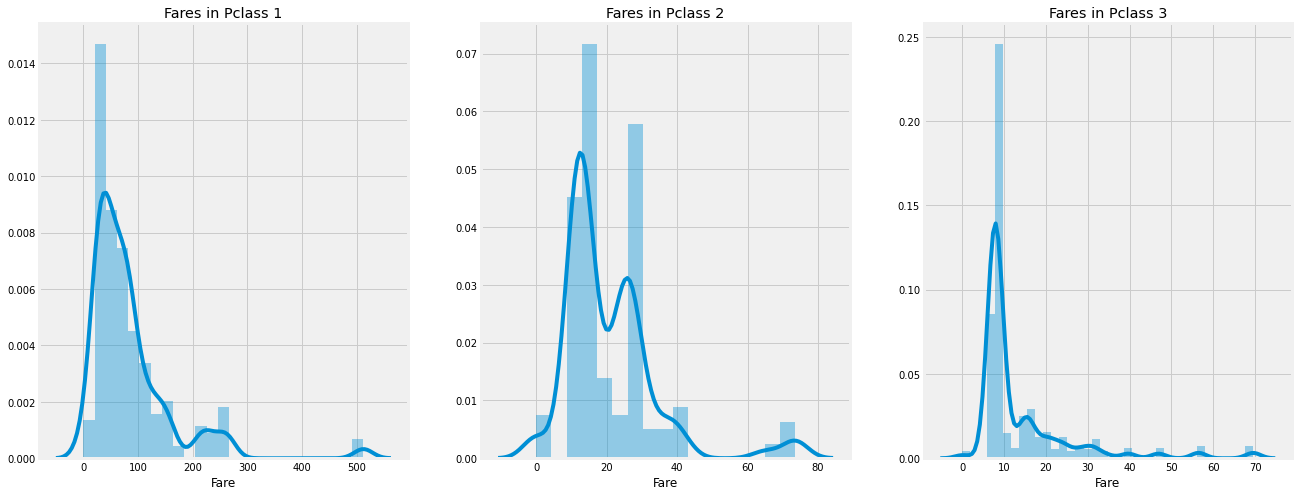

In [0]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

\- There looks to be a large distribution in the fares of Passengers in Pclass1 and this distribution goes on decreasing as the standards reduces. As this is also continous, we can convert into discrete values by using binning.

**\- In summary:**

**Sex**: The chance of survival for women is high as compared to men.

**Pclass**:There is a visible trend that being a 1st class passenger gives you better chances of survival. The survival rate for Pclass3 is very low. For women, the chance of survival from Pclass1 is almost 1 and is high too for those from Pclass2. Money Wins!!!.

**Age**: Children less than 5-10 years do have a high chance of survival. Passengers between age group 15 to 35 died a lot.

**Embarked**: This is a very interesting feature. The chances of survival at C looks to be better than even though the majority of Pclass1 passengers got up at S. Passengers at Q were all from Pclass3.

**Parch+SibSp**: Having 1-2 siblings,spouse on board or 1-3 Parents shows a greater chance of probablity rather than being alone or having a large family travelling with you.


* **Correlation between features**

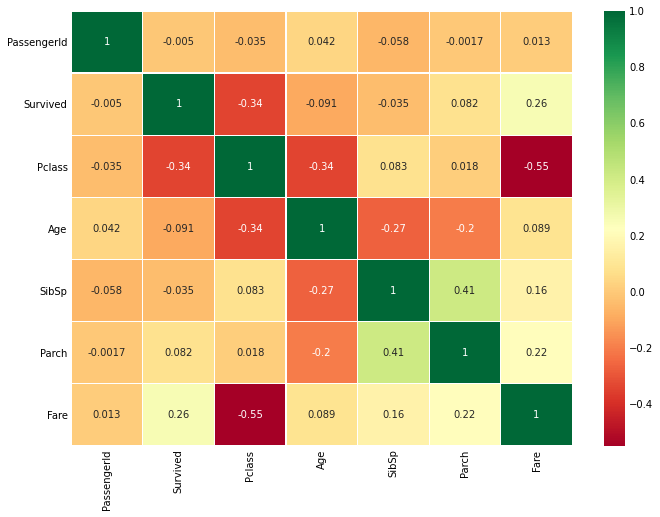

In [0]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

\- From the above heatmap,we can see that the features are not much correlated. The highest correlation is between SibSp and Parch i.e 0.41. So we can carry on with all features.

#### **3. Feature Engineering**

* **Age Band**

\- The age is a continuous variable, thus it would be a problem in predicting the survival variable since continuous variables have high range.

\- We need to convert these continous values into categorical values by either Binning or Normalisation. I will be using binning i.e group a range of ages into a single bin or assign them a single value.

Okay so the maximum age of a passenger was 80. So lets divide the range from 0-80 into 5 bins. So 80/5=16. So bins of size 16.

In [0]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2


In [0]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
1,382
2,325
0,104
3,69
4,11


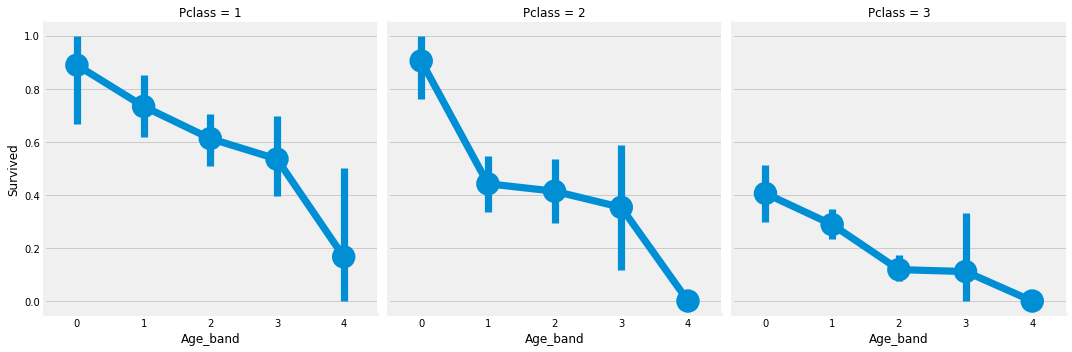

In [0]:
sns.factorplot('Age_band','Survived',data=data,col='Pclass')
plt.show()

* **Family_size and alone**

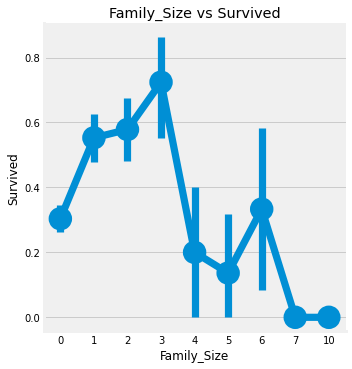

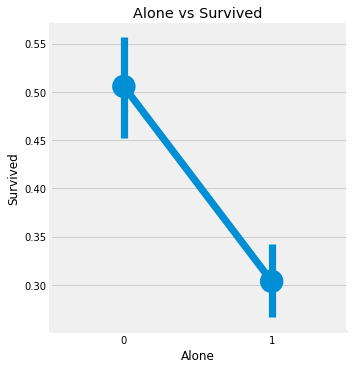

In [0]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']#family size
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1#Alone

sns.factorplot('Family_Size','Survived',data=data)
plt.title('Family_Size vs Survived')
sns.factorplot('Alone','Survived',data=data)
plt.title('Alone vs Survived')
plt.show()

\- Family_Size=0 means that the passeneger is alone. Clearly, if you are alone or family_size=0,then chances for survival is very low. For family size > 4,the chances decrease too. This also looks to be an important feature for the model. Lets examine this further.

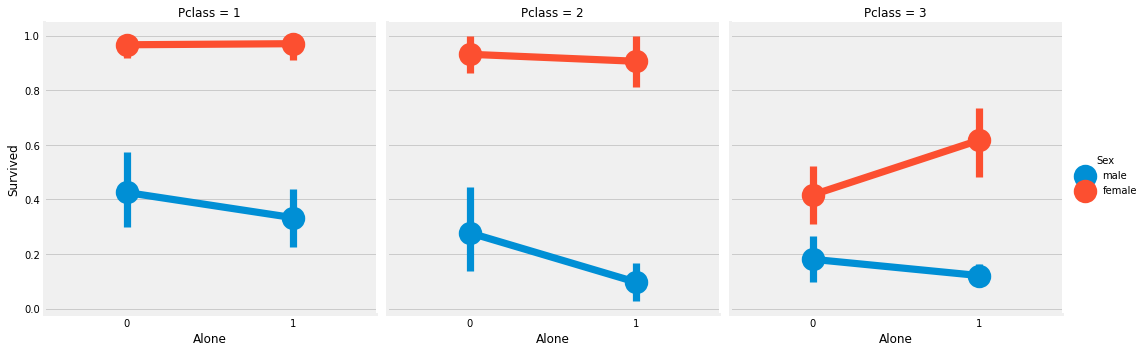

In [0]:
sns.factorplot('Alone','Survived',col='Pclass',data=data,hue='Sex')
plt.show()

\- It is clair that being alone is harmful irrespective of Sex or Pclass except for Pclass3 where the chances of females who are alone are high than those with family.

* **Fare_Range**

\- Since fare is also a continous feature, we need to convert it into ordinal value. For this we will use pandas.qcut.


In [0]:
data['Fare_Range']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


\- As discussed above, we can clearly see that as the fare_range increases, the chances of survival increases.

Now we cannot pass the Fare_Range values as it is. We should convert it into singleton values same as we did in Age_Band

In [0]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

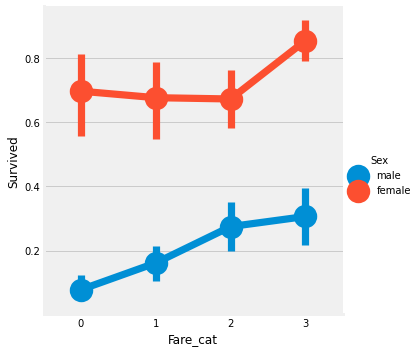

In [0]:
sns.factorplot('Fare_cat','Survived',data=data,hue='Sex')
plt.show()

\- Clearly, as the Fare_cat increases, the survival chances increases. This feature may become an important feature during modeling along with the Sex.

* **Converting String values into numeric**

Since we cannot pass strings to a machine learning model, we need to convert features loke Sex, Embarked, etc into numeric values.


In [0]:
data['Sex']=data['Sex'].map({'male':0,'female':1})
data['Embarked']=data['Embarked'].map({'S':0,'C':1,'Q':2})
data['Initial']=data['Initial'].map({'Mr':0,'Mrs':1,'Miss':2,'Master':3,'Other':4})

**Dropping unnedeed features**

**Name**--> We don't need name feature as it cannot be converted into any categorical value.

**Age**--> We have the Age_band feature, so no need of this.

**Ticket**--> It is any random string that cannot be categorised.

**Fare**--> We have the Fare_cat feature, so unneeded

**Cabin**--> A lot of NaN values and also many passengers have multiple cabins. So this is a useless feature.

**Fare_Range**--> We have the fare_cat feature.

**PassengerId**--> Cannot be categorised.

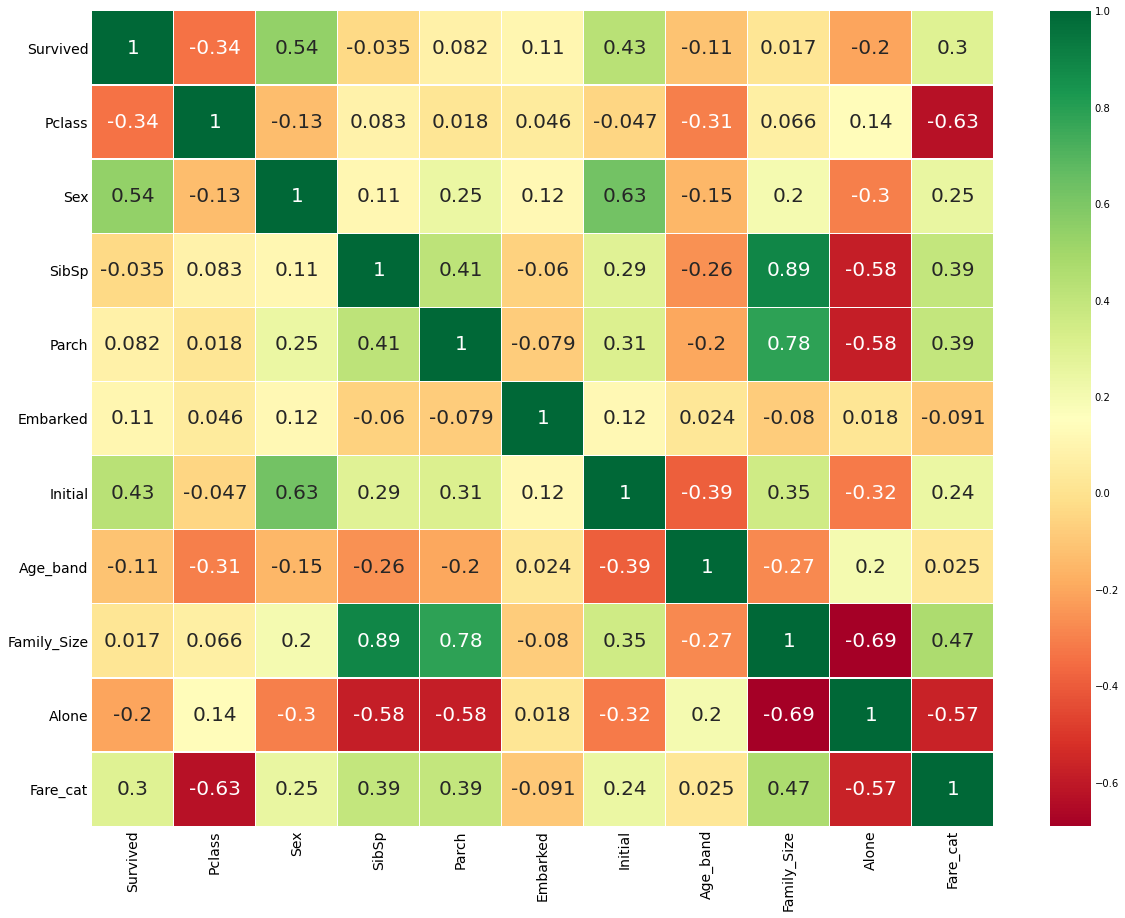

In [0]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


\- Now the above correlation plot, we can see some positively related features. Some of them being SibSp andd Family_Size and Parch and Family_Size and some negative ones like Alone and Family_Size.

#### **4. Predictive modeling**

Till now, we have gained some insights from EDA that will surely help us in the predictive task. So now we will predict the whether the Passenger will survive or not using the following classification algorithms:

1.  Logistic Regression

2. Support Vector Machines(Linear and radial)

3. Random Forest

4. K-Nearest Neighbours

5. Naive Bayes

6. Decision Tree

7. Logistic Regression

Let's start by importing the necessary ML packages.



In [0]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [0]:
# Splitting data into train test:
X_train,X_test,y_train,y_test = train_test_split(data[data.columns[1:]],data['Survived'],
                                                 test_size=0.3, random_state=42)
X=data[data.columns[1:]]
Y=data['Survived']

* **Radial Support Vector Machines(rbf-SVM)**

In [0]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(X_train,y_train)
prediction1=model.predict(X_test)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,y_test))

Accuracy for rbf SVM is  0.835820895522388


* **Linear Support Vector Machine(linear-SVM)**


In [0]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(X_train,y_train)
prediction2=model.predict(X_test)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,y_test))

Accuracy for linear SVM is 0.8097014925373134


* **Logistic regression**

In [0]:
model = LogisticRegression()
model.fit(X_train,y_train)
prediction3=model.predict(X_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,y_test))

The accuracy of the Logistic Regression is 0.7985074626865671


* **Decision Tree**

In [0]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
prediction4=model.predict(X_test)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,y_test))

The accuracy of the Decision Tree is 0.7910447761194029


* **K-Nearest Neighbors(KNN)**

In [0]:
model=KNeighborsClassifier() 
model.fit(X_train,y_train)
prediction5=model.predict(X_test)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,y_test))

The accuracy of the KNN is 0.7947761194029851


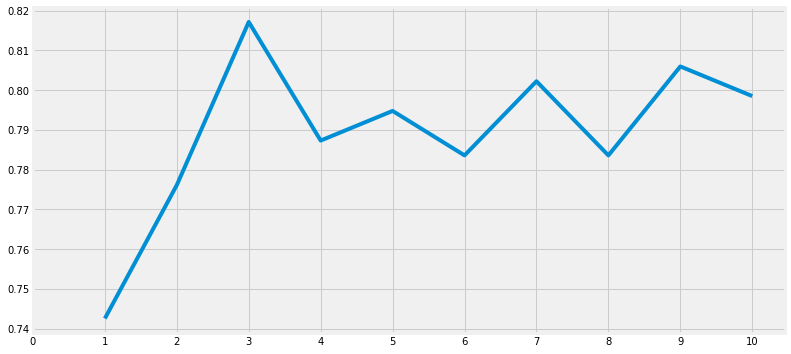

Accuracies for different values of n are: [0.74253731 0.7761194  0.81716418 0.78731343 0.79477612 0.78358209
 0.80223881 0.78358209 0.80597015 0.79850746] with the max value as  0.8171641791044776


In [0]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,y_test)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

* **Gaussian Naive Bayes**

In [0]:
model=GaussianNB()
model.fit(X_train,y_train)
prediction6=model.predict(X_test)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,y_test))

The accuracy of the NaiveBayes is 0.8059701492537313


* **Random Forests**

In [0]:
model=RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)
prediction7=model.predict(X_test)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,y_test))

The accuracy of the Random Forests is 0.7985074626865671


#####Cross Validation

In [0]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.793471,0.047797
Radial Svm,0.828290,0.034427
Logistic Regression,0.805843,0.024061
KNN,0.813783,0.041210
Decision Tree,0.804769,0.032215
Naive Bayes,0.801386,0.028999
Random Forest,0.808127,0.033544


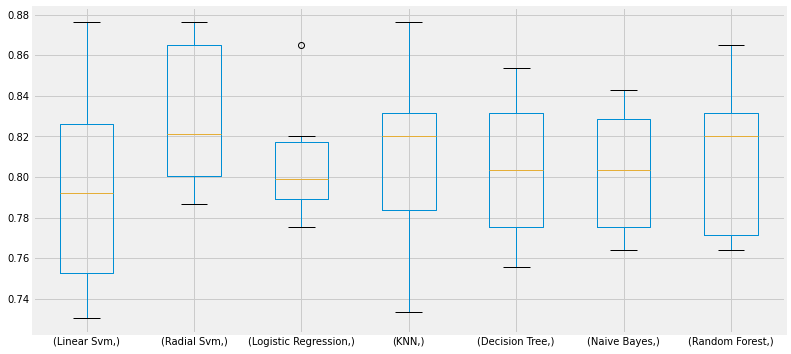

In [0]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

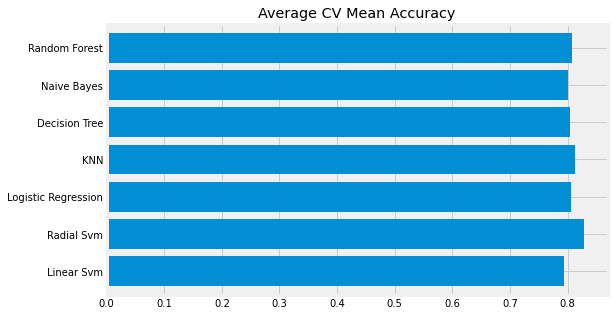

In [0]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

The classification accuracy can be sometimes misleading due to imbalance. We can get a summarized result with the help of confusion matrix, which shows where did the model go wrong, or which class did the model predict wrong.

##### Confusion Matrix

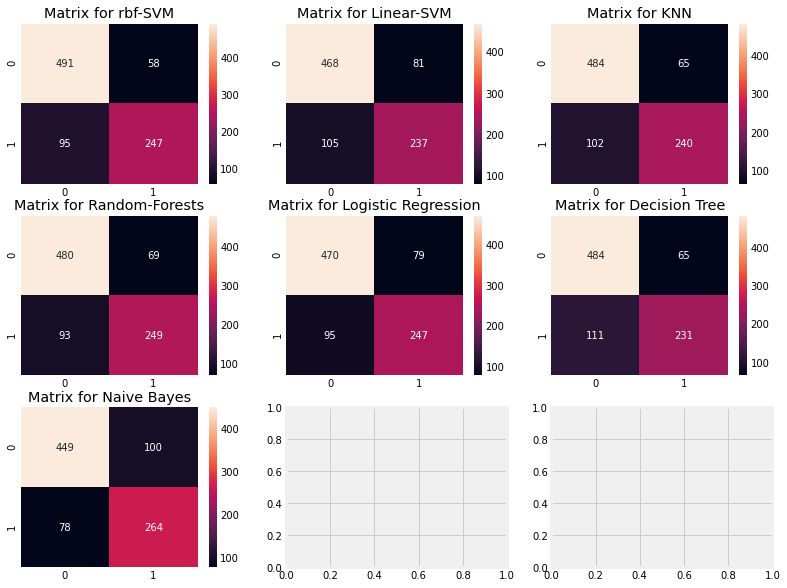

In [0]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()